In [1]:
import pandas as pd

In [2]:
from pandas import Series, DataFrame

In [ ]:
#importing the data of passengers of Titanic from a csv file in table format

In [3]:
titanic_df= pd.read_csv('train.csv')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Depicting the sex wise count of the passengers through bargraph

<AxesSubplot:xlabel='Sex', ylabel='count'>

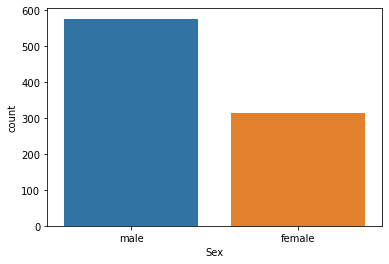

In [22]:
import seaborn as sns
sns.countplot(x='Sex', data=titanic_df)

In [ ]:
#depicting passenger class count in sex demarkation

<AxesSubplot:xlabel='Pclass', ylabel='count'>

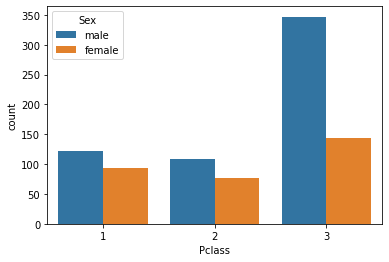

In [24]:
sns.countplot(x='Pclass', data=titanic_df, hue='Sex')

In [ ]:
#creating a function to group people below the age of 16 as 'child'

In [65]:
def male_female_child(passengers):
    age,sex=passengers
    if (age< 16):
        return'child'
    else:
        return sex

In [ ]:
#adding a column in the original dataframe

In [66]:
titanic_df['person']= titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [60]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


<AxesSubplot:xlabel='Pclass', ylabel='count'>

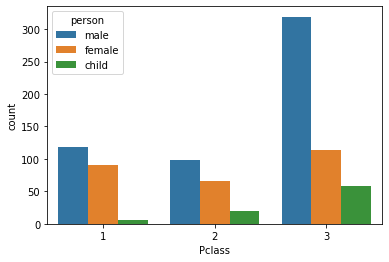

In [68]:
sns.countplot(x='Pclass', data=titanic_df, hue='person')

<AxesSubplot:>

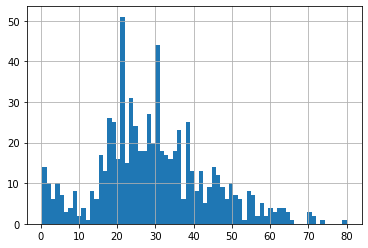

In [74]:
titanic_df['Age'].hist(bins=70)

In [75]:
titanic_df['Age'].mean()

29.69911764705882

In [ ]:
#on an average, people of the age around 30 travelled in the ship

In [77]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

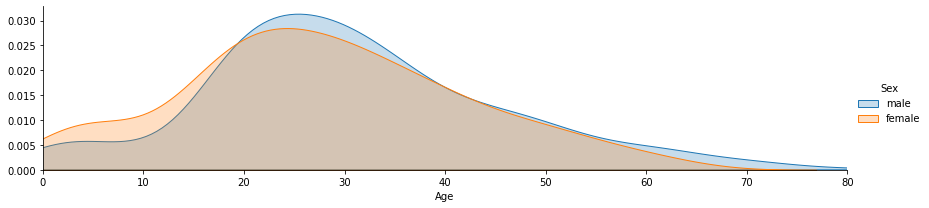

In [79]:
fig=sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot,'Age', shade=True)

oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

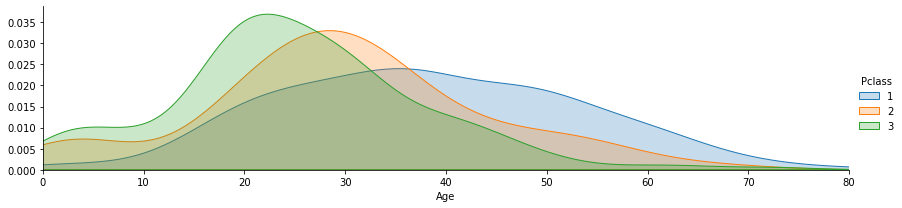

In [80]:
fig=sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot,'Age', shade=True)

oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [ ]:
#we can observe a normal kind of distribution of both sex and Pclass with respect to the age of the passengers

In [84]:
deck=titanic_df['Cabin'].dropna()

In [85]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

<AxesSubplot:xlabel='Cabins', ylabel='count'>

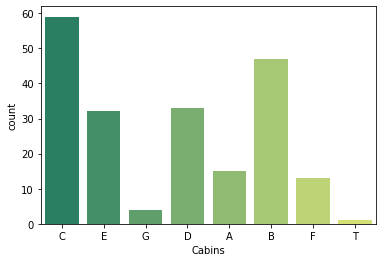

In [132]:
levels=[]

for level in deck:
    levels.append(level[0])
    
cabin_df=DataFrame(levels)
cabin_df.columns =['Cabins']

sns.countplot(x='Cabins', data=cabin_df, palette='summer')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

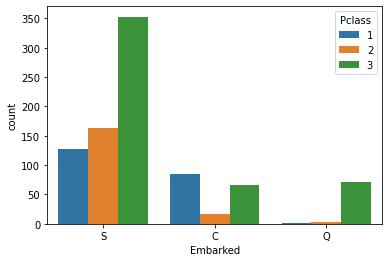

In [102]:
sns.countplot(x='Embarked', data= titanic_df, hue='Pclass')

In [106]:
#who was alone and who was with family?
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [107]:
titanic_df['Alone']=titanic_df.SibSp+titanic_df.Parch

In [ ]:
#here Sib Sp=Siblings/Spouse and Parch=Parents/Children

In [108]:
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [109]:
titanic_df['Alone'].loc[titanic_df['Alone']>0]='with family'
titanic_df['Alone'].loc[titanic_df['Alone']==0]='Alone'

C:\python\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [110]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


<AxesSubplot:xlabel='Alone', ylabel='count'>

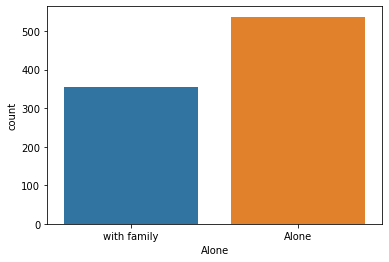

In [111]:
sns.countplot(x='Alone', data=titanic_df)

In [112]:
titanic_df['Survivor']=titanic_df.Survived.map({0:'no',1:'yes'})

In [113]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


<AxesSubplot:xlabel='Survivor', ylabel='count'>

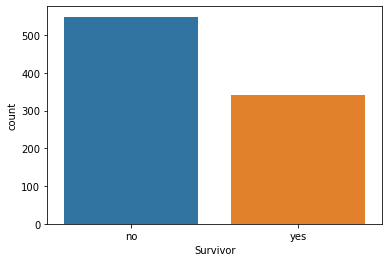

In [114]:
sns.countplot(x='Survivor', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

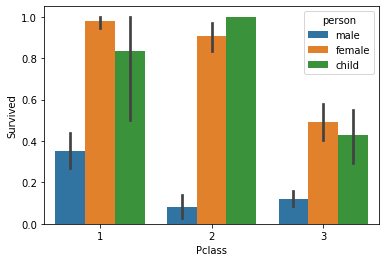

In [121]:
sns.barplot(x='Pclass', y='Survived', hue='person',data=titanic_df)

In [ ]:
#As expected, the survival rate is directly proportional to the Pclass and Female and Children survived more than males

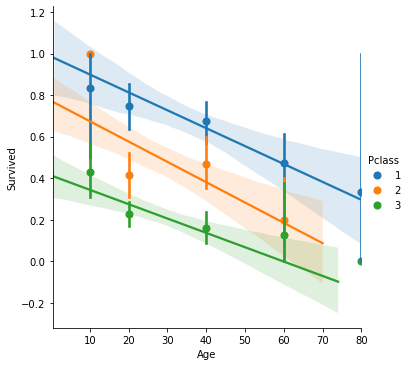

In [125]:
generations=[10,20,40,60,80]
sns.lmplot(x='Age', y='Survived', hue='Pclass',data=titanic_df, x_bins=generations)

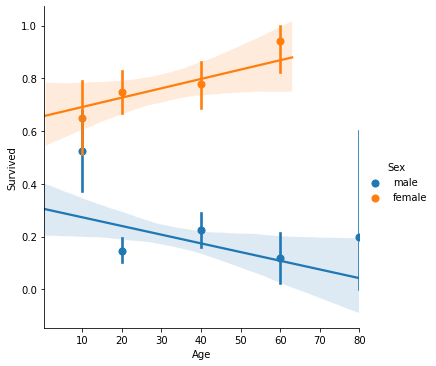

In [126]:
sns.lmplot(x='Age', y='Survived', hue='Sex',data=titanic_df, x_bins=generations)

In [133]:
titanic_df['Cabins']= cabin_df['Cabins']

In [134]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck,Cabins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family,no,NaN,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family,yes,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,NaN,E
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family,yes,C123,G
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Alone,no,NaN,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Alone,yes,B42,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,with family,no,NaN,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Alone,yes,C148,NaN


<AxesSubplot:xlabel='Cabins', ylabel='Survived'>

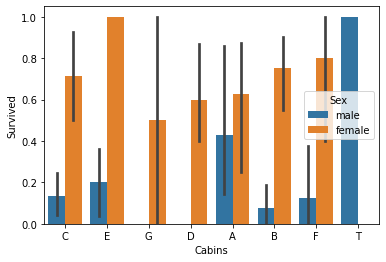

In [136]:
sns.barplot(x='Cabins', y='Survived', data=titanic_df, hue='Sex')

<AxesSubplot:xlabel='Alone', ylabel='Survived'>

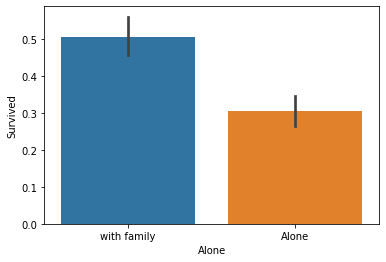

In [137]:
sns.barplot(x='Alone', y='Survived', data=titanic_df)

In [ ]:
"""One of the conclusions of this research was about the survival of families more than people travelling alone,It might be
because in 20th century it was assumed that males with family carry responsibility of the females and children of their 
house, therefore they must be given priorities along with women and children over other males for life boats"""
